In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from matplotlib.ticker import ScalarFormatter

from google.colab import files
uploaded = files.upload()

Saving 10. CO2.csv to 10. CO2 (5).csv


1 (1) Загрузите данные в датафрейм. Выведите несколько строк
загруженных данных, чтобы убедиться, что данные загрузились
корректно.

In [ ]:
df = pd.read_csv("10. CO2.csv")
df.head(3)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


2 (1) Определите количество значений каждого из признаков в
загруженных данных. По каким значениям имеются не все данные?
Примите решение, что делать с отсутствующими данными: заменить
средними значениями или медианами (для числовых данных);
заменить значениями «по умолчанию»; удалить соответствующие
строки. Объясните свой выбор.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

Отсутствующих данных нет

3 (1) Определите тип признаков. Правильно ли определились все типы?
Если необходимо – выполните преобразование к нужному типу. Какие
признаки являются числовыми, какие категориальными?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

Типы определились корректно

Список числовых признаков:

In [ ]:
numeric_cols = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
print(numeric_cols)

['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']


Список категориальных признаков:

In [ ]:
categorical_cols = df.select_dtypes('object').columns.tolist()
print(categorical_cols)

['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']


4 (1) Сформулируйте 2 вопроса, для ответа на которые требуется простая
фильтрация данных (то есть в которых нужно вывести все объекты с каким-то конкретным значением каких-то признаков, например
«вывести всех студентов, получивших меньше 10 баллов за
контрольную»). Получите ответы на эти вопросы.

Выведите список всех машин от производителя BMW с общим потреблением топлива больше 12 литов на 100 км и 6 цилиндрами

In [ ]:
BMW_consumption_most = df[(df['Make']=='BMW') & (df['Fuel Consumption Comb (L/100 km)']>12) & (df['Cylinders']==6)]
BMW_consumption_most

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
137,BMW,Z4 sDRIVE35i,TWO-SEATER,3.0,6,AM7,Z,13.7,10.1,12.1,23,278
139,BMW,Z4 sDRIVE35is,TWO-SEATER,3.0,6,AM7,Z,13.7,10.1,12.1,23,278
1220,BMW,M3 SEDAN,COMPACT,3.0,6,AM7,Z,14.2,9.6,12.1,23,278
1222,BMW,M4 CABRIOLET,SUBCOMPACT,3.0,6,AM7,Z,14.1,9.7,12.1,23,278
1224,BMW,M4 COUPE,COMPACT,3.0,6,AM7,Z,14.1,9.7,12.1,23,278
1250,BMW,Z4 sDRIVE35i,TWO-SEATER,3.0,6,AM7,Z,13.7,10.0,12.1,23,278
1252,BMW,Z4 sDRIVE35is,TWO-SEATER,3.0,6,AM7,Z,13.7,10.0,12.1,23,278
2324,BMW,M3,COMPACT,3.0,6,AM7,Z,14.1,9.7,12.1,23,284
2326,BMW,M4 CABRIOLET,SUBCOMPACT,3.0,6,AM7,Z,14.2,9.6,12.1,23,282
2328,BMW,M4 COUPE,COMPACT,3.0,6,AM7,Z,14.1,9.7,12.1,23,284


Вывести список автомобилей на природном газе чьи выбросы CO2 составляют меньше 250

In [ ]:
most_natural = df[(df['Fuel Type']=='N') & (df['CO2 Emissions(g/km)']<250)]
most_natural

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
2439,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,AS6,N,15.2,9.5,12.7,22,213


5 (1) Сформулируйте 2 вопроса, использующих агрегирующие функции
(например, «вывести средний возраст студентов»).

Вывести среднее кличество цлиндров по всем автомобилям

In [ ]:
avg_cylinders = df['Cylinders'].mean()
print(avg_cylinders)

5.615030467163169


Получается, что в среднем у автомобилей 6 цилиндров

Выведите количество автомобилей, чьи выбросы CO2 меньше 180 грамм на километр

In [ ]:
most_ecological = df[df['CO2 Emissions(g/km)']<180]
print(len(most_ecological))

690


Получается, что примерно только у 10% из всех автомобилей умеренное количество выбросов

6 (1)
Сформулируйте
2
вопроса о поиске объектов с
максимальным/минимальным значением одного из признаков
(например, «вывести 5 студентов с максимальными баллами» или
«вывести 10% студентов с минимальными баллами»).

Вывести данные о 10 автомобилях с наименьшим количеством выбросов углерода

In [ ]:
sorted_by_emission = df.sort_values(by='CO2 Emissions(g/km)')
sorted_by_emission.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
3824,HYUNDAI,IONIQ BLUE,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96
6950,HYUNDAI,IONIQ Blue,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96
4900,HYUNDAI,IONIQ BLUE,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96
5931,HYUNDAI,IONIQ Blue,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96
6949,HYUNDAI,IONIQ,FULL-SIZE,1.6,4,AM6,X,4.2,4.2,4.2,67,99
4899,HYUNDAI,IONIQ,FULL-SIZE,1.6,4,AM6,X,4.3,4.4,4.3,66,102
3823,HYUNDAI,IONIQ,FULL-SIZE,1.6,4,AM6,X,4.3,4.4,4.4,64,103
3229,TOYOTA,PRIUS,MID-SIZE,1.8,4,AV,X,4.4,4.6,4.5,63,104
5930,HYUNDAI,IONIQ,FULL-SIZE,1.6,4,AM6,X,4.3,4.4,4.3,66,104
6442,TOYOTA,Prius,MID-SIZE,1.8,4,AV,X,4.4,4.6,4.4,64,105


Вывести данные о автомобиле с самым большим потреблением топлива по городу производителя JEEP

In [ ]:
jeep_cars = df[df['Make']=='JEEP']
jeep_cars_max_cons = jeep_cars['Fuel Consumption City (L/100 km)'].idxmax()
jeep_cars.loc[jeep_cars_max_cons]

,4975
Make,JEEP
Model,GRAND CHEROKEE 4X4 TRACKHAWK
Vehicle Class,SUV - STANDARD
Engine Size(L),6.2
Cylinders,8
Transmission,A8
Fuel Type,Z
Fuel Consumption City (L/100 km),20.9
Fuel Consumption Hwy (L/100 km),13.8
Fuel Consumption Comb (L/100 km),17.7


7 (1) Выберите 1 категориальный признак с небольшим количеством
возможных значений. Постройте ленточную или столбчатую
диаграмму, которая отображает количество объектов по каждому
значению выбранного признака (например, количество студентов в
каждой группе).

Построить ленточную диаграмму по классам автомобилей

<BarContainer object of 16 artists>

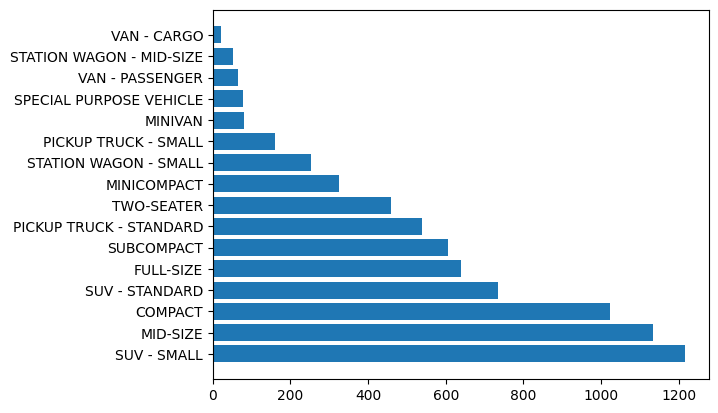

In [ ]:
vehicle_class_counts = df['Vehicle Class'].value_counts()
plt.barh(vehicle_class_counts.index, vehicle_class_counts.values)


8 (1) Выберите другой категориальный признак и постройте круговую
диаграмму.

Построить круговую диаграмму по типам топлива

([<matplotlib.patches.Wedge at 0x7c686e79b920>,
 [Text(0.025968272393383302, 1.0996934340210016, 'X'),
  Text(-0.2784053836656764, -1.0641853421025718, 'Z'),
  Text(1.0485224559159183, -0.33256677440786436, 'E'),
  Text(1.0968832754201743, -0.08274708516624779, 'D'),
  Text(1.0999999005796137, -0.00046768027542291163, 'N')])

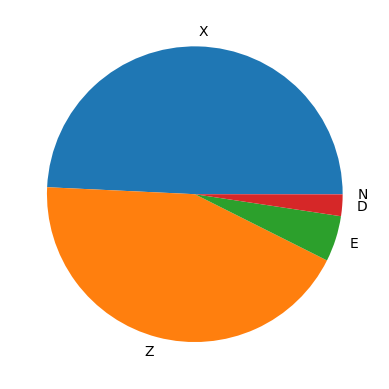

In [ ]:
fuel_types_counts = df['Fuel Type'].value_counts()
fig, ax = plt.subplots()
ax.pie(fuel_types_counts.values, labels=fuel_types_counts.index)

Как-то странно отображается N, то есть, топливо из натурального газа, посмотрим, сколько таких автомобилей в общем

In [ ]:
N_cars_counts = len(df[df['Fuel Type']=='N'])
print(N_cars_counts)

1


Да, такой автомобиль действительно один

9 (2) Сгруппируйте данные по одному из категориальных признаков и
выведите агрегированную информацию по 2 числовым признакам
(например, максимальный и средний балл за контрольную в каждой
группе).

Сгруппируйте данные по маркам автомобиля и выведите среднее количество выбросов углерода и максимальное значение по каждой марке

In [ ]:
group_makers = df.groupby('Make').agg( mean_emission=('CO2 Emissions(g/km)', 'mean'), max_emissiom=('CO2 Emissions(g/km)', 'max')).round(2)
group_makers

,mean_emission,max_emissiom
Make,,
ACURA,223.65,267
ALFA ROMEO,224.90,292
ASTON MARTIN,339.62,450
AUDI,250.85,409
BENTLEY,362.93,465
BMW,254.01,370
BUGATTI,522.00,522
BUICK,233.06,323
CADILLAC,265.85,382


10 (1) На основе имеющихся признаков сформулируйте какой-то новый и
добавьте его в датафрейм (например, новый бинарный признак «сдал
зачет» на основе баллов за контрольную).

Добавить признак является ли автомобиль eco-friendly, по Европе автомобтль таким считается если от производит меньше 130 г/км

In [ ]:
df['Eco Friendly'] = (df['CO2 Emissions(g/km)'] < 130).astype(int)
df.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Eco Friendly
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,0
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,0
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,0


11 (2) Выберите 3 числовых признака и попарно исследуйте их на наличие
связи между ними, построив точечную диаграмму (диаграмму
рассеяния). Сделайте вывод о зависимости между этими признаками.

Text(0, 0.5, 'Количество CO2 выбросов (г/км)')

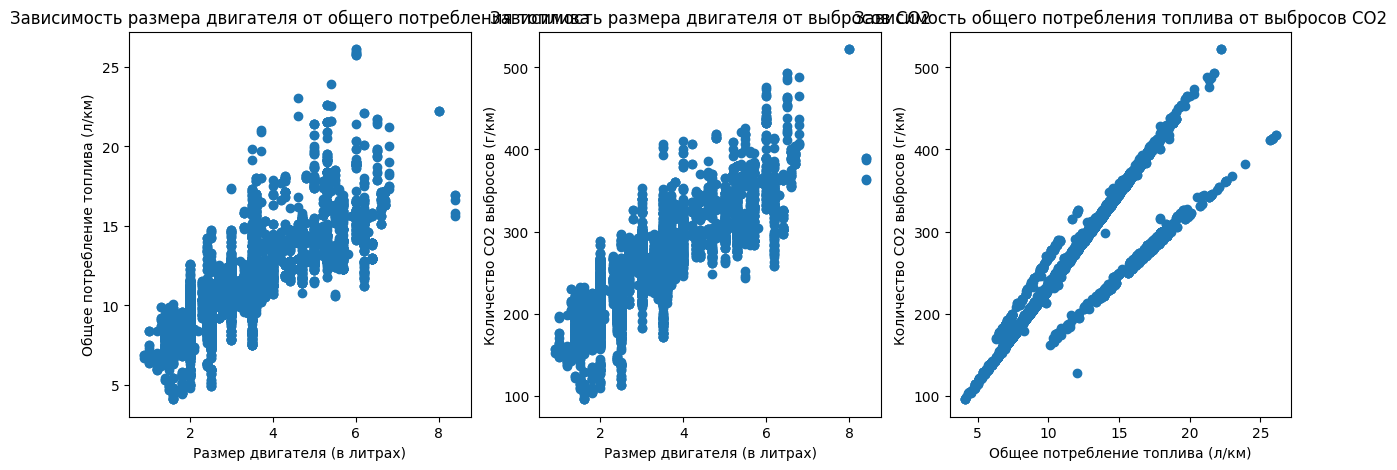

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(df['Engine Size(L)'], df['Fuel Consumption Comb (L/100 km)'])
axes[0].set_title('Зависимость размера двигателя от общего потребления топлива')
axes[0].set_xlabel('Размер двигателя (в литрах)')
axes[0].set_ylabel('Общее потребление топлива (л/км)')

axes[1].scatter(df['Engine Size(L)'], df['CO2 Emissions(g/km)'])
axes[1].set_title('Зависимость размера двигателя от выбросов CO2')
axes[1].set_xlabel('Размер двигателя (в литрах)')
axes[1].set_ylabel('Количество CO2 выбросов (г/км)')

axes[2].scatter(df['Fuel Consumption Comb (L/100 km)'], df['CO2 Emissions(g/km)'])
axes[2].set_title('Зависимость общего потребления топлива от выбросов CO2')
axes[2].set_xlabel('Общее потребление топлива (л/км)')
axes[2].set_ylabel('Количество CO2 выбросов (г/км)')

Хорошая линейная зависимость между всеми тремя

12 (3) Выберите 3 числовых признака и постройте boxplot («ящик с усами»)
по каждому из них. Определите наличие выбросов по диаграмме.
Выберите 1 признак с наиболее явно выраженными выбросами.
Напишите код, который по формулам будет определять все выбросы по
выбранному признаку и заменит их на максимальное значение, не
считающееся выбросом.

Text(0.5, 0.98, 'Ящики с усами по всем трем признакам')

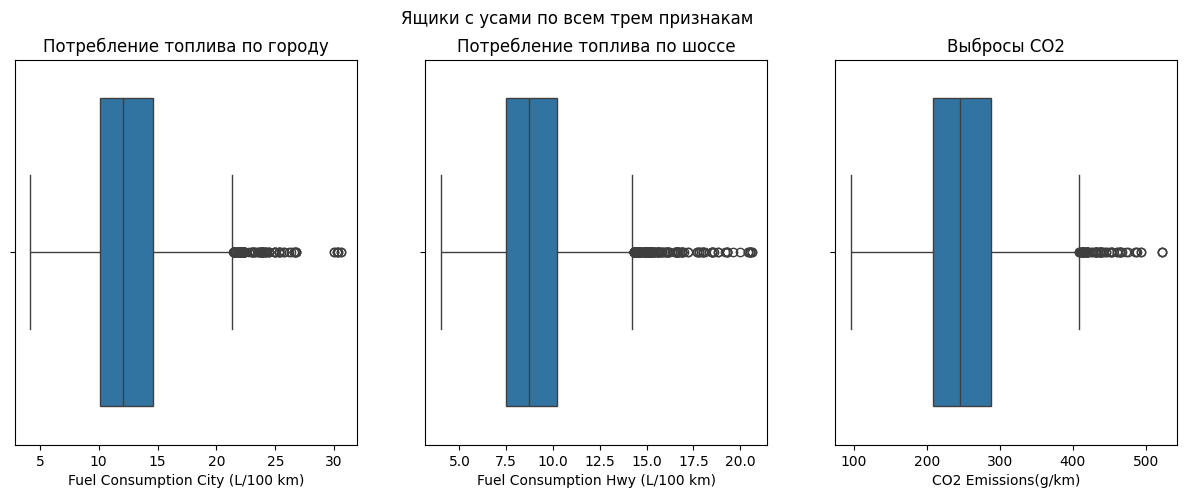

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x=df['Fuel Consumption City (L/100 km)'], ax=axes[0])
axes[0].set_title('Потребление топлива по городу')

sns.boxplot(x=df['Fuel Consumption Hwy (L/100 km)'], ax=axes[1])
axes[1].set_title('Потребление топлива по шоссе')

sns.boxplot(x=df['CO2 Emissions(g/km)'], ax=axes[2])
axes[2].set_title('Выбросы CO2')
plt.suptitle('Ящики с усами по всем трем признакам', fontsize=12)

На потреблении топлива на шоссе видно больше всего выбросов, возьмем его

Text(0.5, 1.0, 'Без выбросов: ')

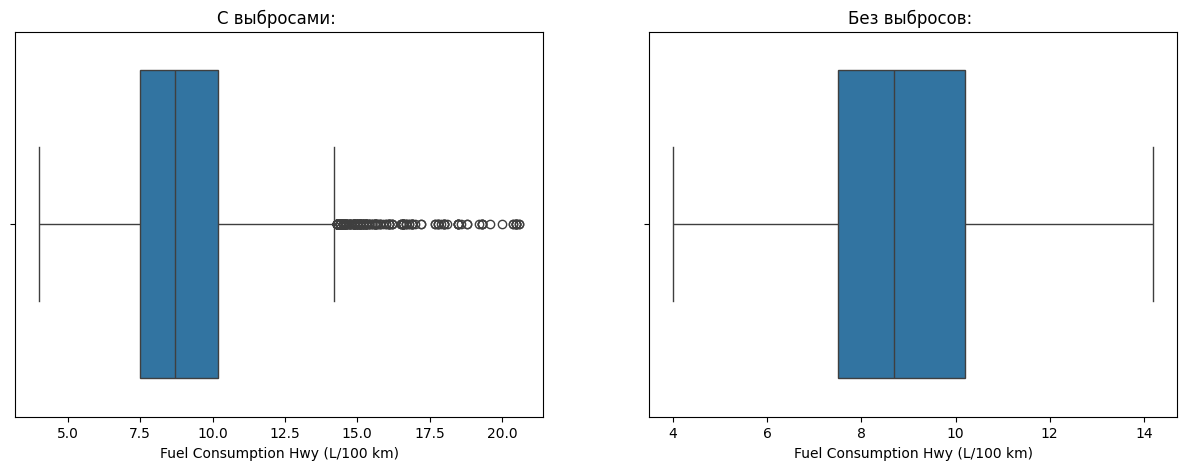

In [ ]:
Q1 = df['Fuel Consumption Hwy (L/100 km)'].quantile(0.25)
Q3 = df['Fuel Consumption Hwy (L/100 km)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

max_clean = df[(df['Fuel Consumption Hwy (L/100 km)'] >= lower_bound) & (df['Fuel Consumption Hwy (L/100 km)'] <= upper_bound)]['Fuel Consumption Hwy (L/100 km)'].max()

df_clean = df.copy()
df_clean.loc[df_clean['Fuel Consumption Hwy (L/100 km)'] > upper_bound, 'Fuel Consumption Hwy (L/100 km)'] = max_clean
df_clean.loc[df_clean['Fuel Consumption Hwy (L/100 km)'] < lower_bound, 'Fuel Consumption Hwy (L/100 km)'] = max_clean

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=df['Fuel Consumption Hwy (L/100 km)'], ax=axes[0])
axes[0].set_title('С выбросами: ')

sns.boxplot(x=df_clean['Fuel Consumption Hwy (L/100 km)'], ax=axes[1])
axes[1].set_title('Без выбросов: ')

13.Примите решение, какую задачу будете решать на выбранном
датасете: регрессию, классификацию или кластеризацию. Для
предложенных датасетов рекомендованный вид задачи указан в
таблице с вариантами.

На пункте 11 была видна хорошая линейная зависимость, так что наиболее разумным будет решать задачу о регрессии

14 (1) Сформируйте список факторных признаков. Для задач регрессии и
классификации определите целевой признак.

In [ ]:
target_col = 'CO2 Emissions(g/km)'
feature_cols = ['Engine Size(L)', 'Cylinders', 'Fuel Type', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'Eco Friendly']

Не добавили только производителя, модель, трансмиссию и класс так как их кодирование вызовет трудность, по ним очень много значений

15 (1)
Выполните кодирование всех категориальных факторных
признаков. Учитывайте, является ли признак бинарным, ранговым,
либо ни тем, ни другим.

In [ ]:
df = pd.get_dummies(df,
                           columns=['Fuel Type'],
                           prefix=['Fuel Type'])

16 (1) Выполните нормализацию всех факторных признаков.

In [ ]:
to_normalize = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']

scaler = MinMaxScaler()
df[to_normalize] = scaler.fit_transform(df[to_normalize])

17.Для задач регрессии и классификации выполните разбиение на обучающую и тестовую выборки.

In [ ]:
feature_cols = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'Eco Friendly', 'Fuel Type_D', 'Fuel Type_E', 'Fuel Type_N', 'Fuel Type_X', 'Fuel Type_Z']

X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=23)

18 (2) Выберите 2 модели для решения поставленной задачи.
1) Для регрессии и классификации: обучите модели, получите
прогнозные значения

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_train_linear = linear_model.predict(X_train)
y_pred_test_linear = linear_model.predict(X_test)

ridge_model = Ridge(alpha=1.0, random_state=23)
ridge_model.fit(X_train, y_train)

y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_test_ridge = ridge_model.predict(X_test)


19 (1) Посчитайте метрики (показатели качества)

In [ ]:
R2_train_linear = r2_score(y_train, y_pred_train_linear)
R2_test_linear = r2_score(y_test, y_pred_test_linear)
RMSE_train_linear = mean_squared_error(y_train, y_pred_train_linear)**0.5
RMSE_test_linear = mean_squared_error(y_test, y_pred_test_linear)**0.5

R2_train_ridge = r2_score(y_train, y_pred_train_ridge)
R2_test_ridge = r2_score(y_test, y_pred_test_ridge)
RMSE_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)**0.5
RMSE_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)**0.5

print("Гребневая регрессия")
print(f"Коэффициент детерминации обучающей выборки: {R2_train_ridge:.2f}")
print(f"Коэффициент детерминации тестовой выборки:  {R2_test_ridge:.2f}")
print(f"Корень из среднеквадратичной ошибки обучающей выборки: {RMSE_train_ridge:.2f}")
print(f"Корень из среднеквадратичной ошибки тестовой выборки:  {RMSE_test_ridge:.2f}")

print("\nЛинейная регрессия: ")
print(f"Коэффициент детерминации обучающей выборки: {R2_train_linear:.2f}")
print(f"Коэффициент детерминации тестовой выборки: {R2_test_linear:.2f}")
print(f"Корень из среднеквадратичной ошибки обучающей выборки: {RMSE_train_linear:.2f}")
print(f"Корень из среднеквадратичной ошибки тестовой выборки: {RMSE_test_linear:.2f}")

Гребневая регрессия
Коэффициент детерминации обучающей выборки: 0.99
Коэффициент детерминации тестовой выборки:  0.99
Корень из среднеквадратичной ошибки обучающей выборки: 4.94
Корень из среднеквадратичной ошибки тестовой выборки:  5.10

Линейная регрессия: 
Коэффициент детерминации обучающей выборки: 0.99
Коэффициент детерминации тестовой выборки: 0.99
Корень из среднеквадратичной ошибки обучающей выборки: 4.89
Корень из среднеквадратичной ошибки тестовой выборки: 5.04


Похоже имеется прямая зависимость, которая и была видна на графиках ранее, попробуем убрать признаки, связанные с потреблением топлива, скорее всего они имеют прямую корреляцию

Вместо них попробуем доавить в факторные признаки производителя и класс

In [ ]:
df = pd.get_dummies(df, columns=['Vehicle Class'], prefix=['Vehicle Class'])

make_freq = df['Make'].value_counts()
df['Make_Frequency'] = df['Make'].map(make_freq)


In [ ]:
df.columns

Index(['Make', 'Model', 'Engine Size(L)', 'Cylinders', 'Transmission',
       'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
       'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)',
       'CO2 Emissions(g/km)', 'Eco Friendly', 'Fuel Type_D', 'Fuel Type_E',
       'Fuel Type_N', 'Fuel Type_X', 'Fuel Type_Z', 'Vehicle Class_COMPACT',
       'Vehicle Class_FULL-SIZE', 'Vehicle Class_MID-SIZE',
       'Vehicle Class_MINICOMPACT', 'Vehicle Class_MINIVAN',
       'Vehicle Class_PICKUP TRUCK - SMALL',
       'Vehicle Class_PICKUP TRUCK - STANDARD',
       'Vehicle Class_SPECIAL PURPOSE VEHICLE',
       'Vehicle Class_STATION WAGON - MID-SIZE',
       'Vehicle Class_STATION WAGON - SMALL', 'Vehicle Class_SUBCOMPACT',
       'Vehicle Class_SUV - SMALL', 'Vehicle Class_SUV - STANDARD',
       'Vehicle Class_TWO-SEATER', 'Vehicle Class_VAN - CARGO',
       'Vehicle Class_VAN - PASSENGER', 'Make_Frequency'],
      dtype='object')

In [ ]:
feature_cols = ['Make_Frequency', 'Vehicle Class_COMPACT',
       'Vehicle Class_FULL-SIZE', 'Vehicle Class_MID-SIZE',
       'Vehicle Class_MINICOMPACT', 'Vehicle Class_MINIVAN',
       'Vehicle Class_PICKUP TRUCK - SMALL',
       'Vehicle Class_PICKUP TRUCK - STANDARD',
       'Vehicle Class_SPECIAL PURPOSE VEHICLE',
       'Vehicle Class_STATION WAGON - MID-SIZE',
       'Vehicle Class_STATION WAGON - SMALL', 'Vehicle Class_SUBCOMPACT',
       'Vehicle Class_SUV - SMALL', 'Vehicle Class_SUV - STANDARD',
       'Vehicle Class_TWO-SEATER', 'Vehicle Class_VAN - CARGO',
       'Vehicle Class_VAN - PASSENGER', 'Engine Size(L)', 'Cylinders', 'Eco Friendly', 'Fuel Type_D', 'Fuel Type_E', 'Fuel Type_N', 'Fuel Type_X', 'Fuel Type_Z']

In [ ]:
X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=23)

linear_model2 = LinearRegression()
linear_model2.fit(X_train, y_train)

y_pred_train_linear = linear_model2.predict(X_train)
y_pred_test_linear = linear_model2.predict(X_test)

ridge_model2 = Ridge(alpha=1.0, random_state=23)
ridge_model2.fit(X_train, y_train)

y_pred_train_ridge = ridge_model2.predict(X_train)
y_pred_test_ridge = ridge_model2.predict(X_test)

R2_train_linear = r2_score(y_train, y_pred_train_linear)
R2_test_linear = r2_score(y_test, y_pred_test_linear)
RMSE_train_linear = mean_squared_error(y_train, y_pred_train_linear)**0.5
RMSE_test_linear = mean_squared_error(y_test, y_pred_test_linear)**0.5

R2_train_ridge = r2_score(y_train, y_pred_train_ridge)
R2_test_ridge = r2_score(y_test, y_pred_test_ridge)
RMSE_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)**0.5
RMSE_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)**0.5

print("Гребневая регрессия")
print(f"Коэффициент детерминации обучающей выборки: {R2_train_ridge:.2f}")
print(f"Коэффициент детерминации тестовой выборки:  {R2_test_ridge:.2f}")
print(f"Корень из среднеквадратичной ошибки обучающей выборки: {RMSE_train_ridge:.2f}")
print(f"Корень из среднеквадратичной ошибки тестовой выборки:  {RMSE_test_ridge:.2f}")

print("\nЛинейная регрессия: ")
print(f"Коэффициент детерминации обучающей выборки: {R2_train_linear:.2f}")
print(f"Коэффициент детерминации тестовой выборки: {R2_test_linear:.2f}")
print(f"Корень из среднеквадратичной ошибки обучающей выборки: {RMSE_train_linear:.2f}")
print(f"Корень из среднеквадратичной ошибки тестовой выборки: {RMSE_test_linear:.2f}")

Гребневая регрессия
Коэффициент детерминации обучающей выборки: 0.84
Коэффициент детерминации тестовой выборки:  0.83
Корень из среднеквадратичной ошибки обучающей выборки: 23.26
Корень из среднеквадратичной ошибки тестовой выборки:  24.07

Линейная регрессия: 
Коэффициент детерминации обучающей выборки: 0.84
Коэффициент детерминации тестовой выборки: 0.83
Корень из среднеквадратичной ошибки обучающей выборки: 23.26
Корень из среднеквадратичной ошибки тестовой выборки: 24.07


Такие предсказывания уже выглядят более настоящими

20 (3) Для каждой из моделей выберите один гиперпараметр. Выполните
моделирование с различными значениями гиперпараметра и
постройте график зависимости получаемых показателей качества
(метрик) от значения гиперпараметра.

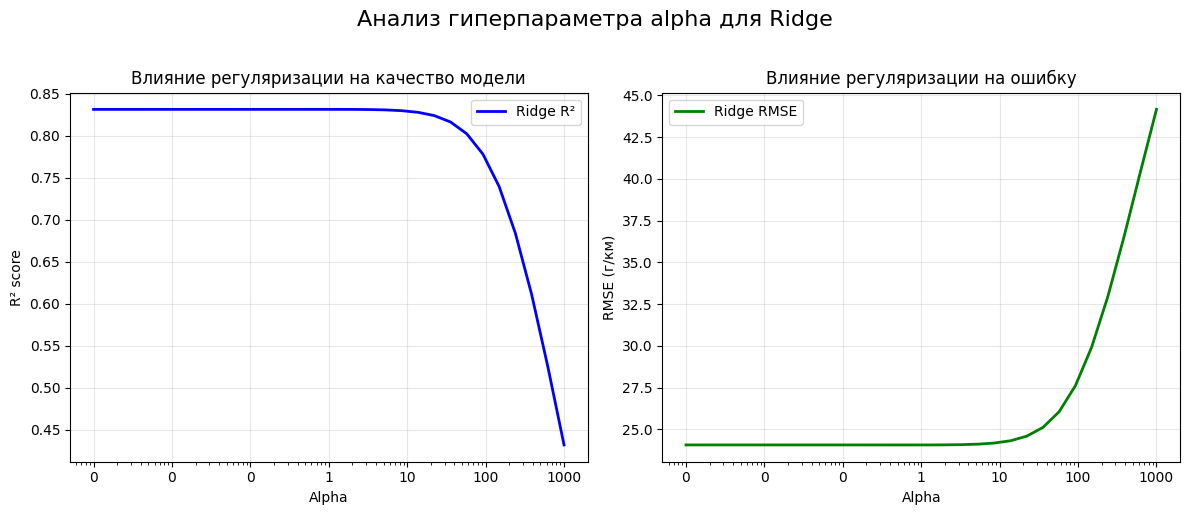

In [ ]:
alpha_values = np.logspace(-3, 3, 30)  # от 0.001 до 1000
r2_scores_ridge = []
rmse_scores_ridge = []

for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)

    r2_scores_ridge.append(r2_score(y_test, y_pred))
    rmse_scores_ridge.append(np.sqrt(mean_squared_error(y_test, y_pred)))


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.semilogx(alpha_values, r2_scores_ridge, 'b-', linewidth=2, label='Ridge R²')


ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain', axis='x')

plt.xlabel('Alpha')
plt.ylabel('R² score')
plt.title('Влияние регуляризации на качество модели')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 2, 2)
plt.semilogx(alpha_values, rmse_scores_ridge, 'g-', linewidth=2, label='Ridge RMSE')

ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain', axis='x')

plt.xlabel('Alpha')
plt.ylabel('RMSE (г/км)')
plt.title('Влияние регуляризации на ошибку')
plt.grid(True, alpha=0.3)
plt.legend()

plt.suptitle('Анализ гиперпараметра alpha для Ridge', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()